In [1]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
glass= pd.read_csv("D:\EXCLER solution\ASSIGNMENT\KNN\glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
glass.duplicated().sum()

1

In [5]:
glass.drop_duplicates(inplace=True)

In [6]:
glass.duplicated().sum()

0

In [7]:
glass.Type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
glass.shape

(213, 10)

In [10]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


# Normalizing data

In [11]:
from sklearn.preprocessing import scale

glass1=glass.iloc[:,:9]

In [12]:
# Converting into numpy array
glass2=glass1.values

In [13]:
# Normalizing the  data 
glass_norm = scale(glass2)

## Train test split

In [14]:
from sklearn.model_selection import train_test_split

x=glass_norm
y=glass['Type']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# KNN (K Neighrest Neighbour Classifier)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the CV results

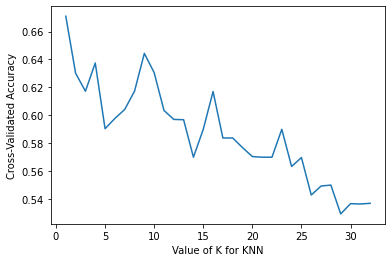

In [17]:
k_range = range(1, 33)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    train_scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(train_scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [18]:
model = KNeighborsClassifier(n_neighbors=2)

In [19]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [20]:
model.score(x_test, y_test)

0.671875

In [27]:
k_scores

[0.6710344827586207,
 0.6301149425287356,
 0.6172413793103448,
 0.6374712643678161,
 0.590344827586207,
 0.5977011494252873,
 0.6041379310344828,
 0.6172413793103448,
 0.6443678160919539,
 0.6305747126436783,
 0.603448275862069,
 0.5970114942528737,
 0.5967816091954024,
 0.5698850574712644,
 0.5898850574712644,
 0.6170114942528736,
 0.5836781609195402,
 0.5836781609195402,
 0.5767816091954022,
 0.5703448275862069,
 0.5698850574712644,
 0.5698850574712644,
 0.5898850574712643,
 0.5632183908045977,
 0.5696551724137932,
 0.5427586206896551,
 0.5491954022988506,
 0.5498850574712644,
 0.5291954022988505,
 0.5365517241379311,
 0.5363218390804597,
 0.5367816091954023]

# Grid Search for Algorithm Tuning

In [21]:
# Grid Search for Algorithm Tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [23]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [24]:
print(grid.best_score_)
print(grid.best_params_)

0.6710344827586207
{'n_neighbors': 1}


Text(0, 0.5, 'Count')

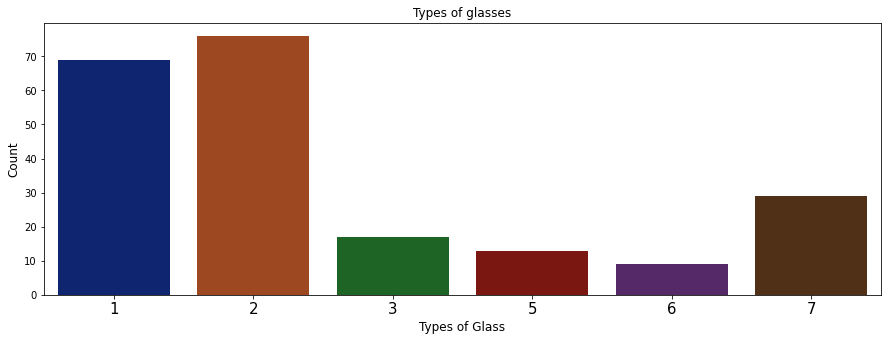

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
    
plt.title("Types of glasses")
sns.countplot(data=glass, x="Type",palette = "dark")
plt.xticks(rotation = 0, size = 15)
plt.xlabel("Types of Glass", fontsize=12)
plt.ylabel("Count", fontsize=12)

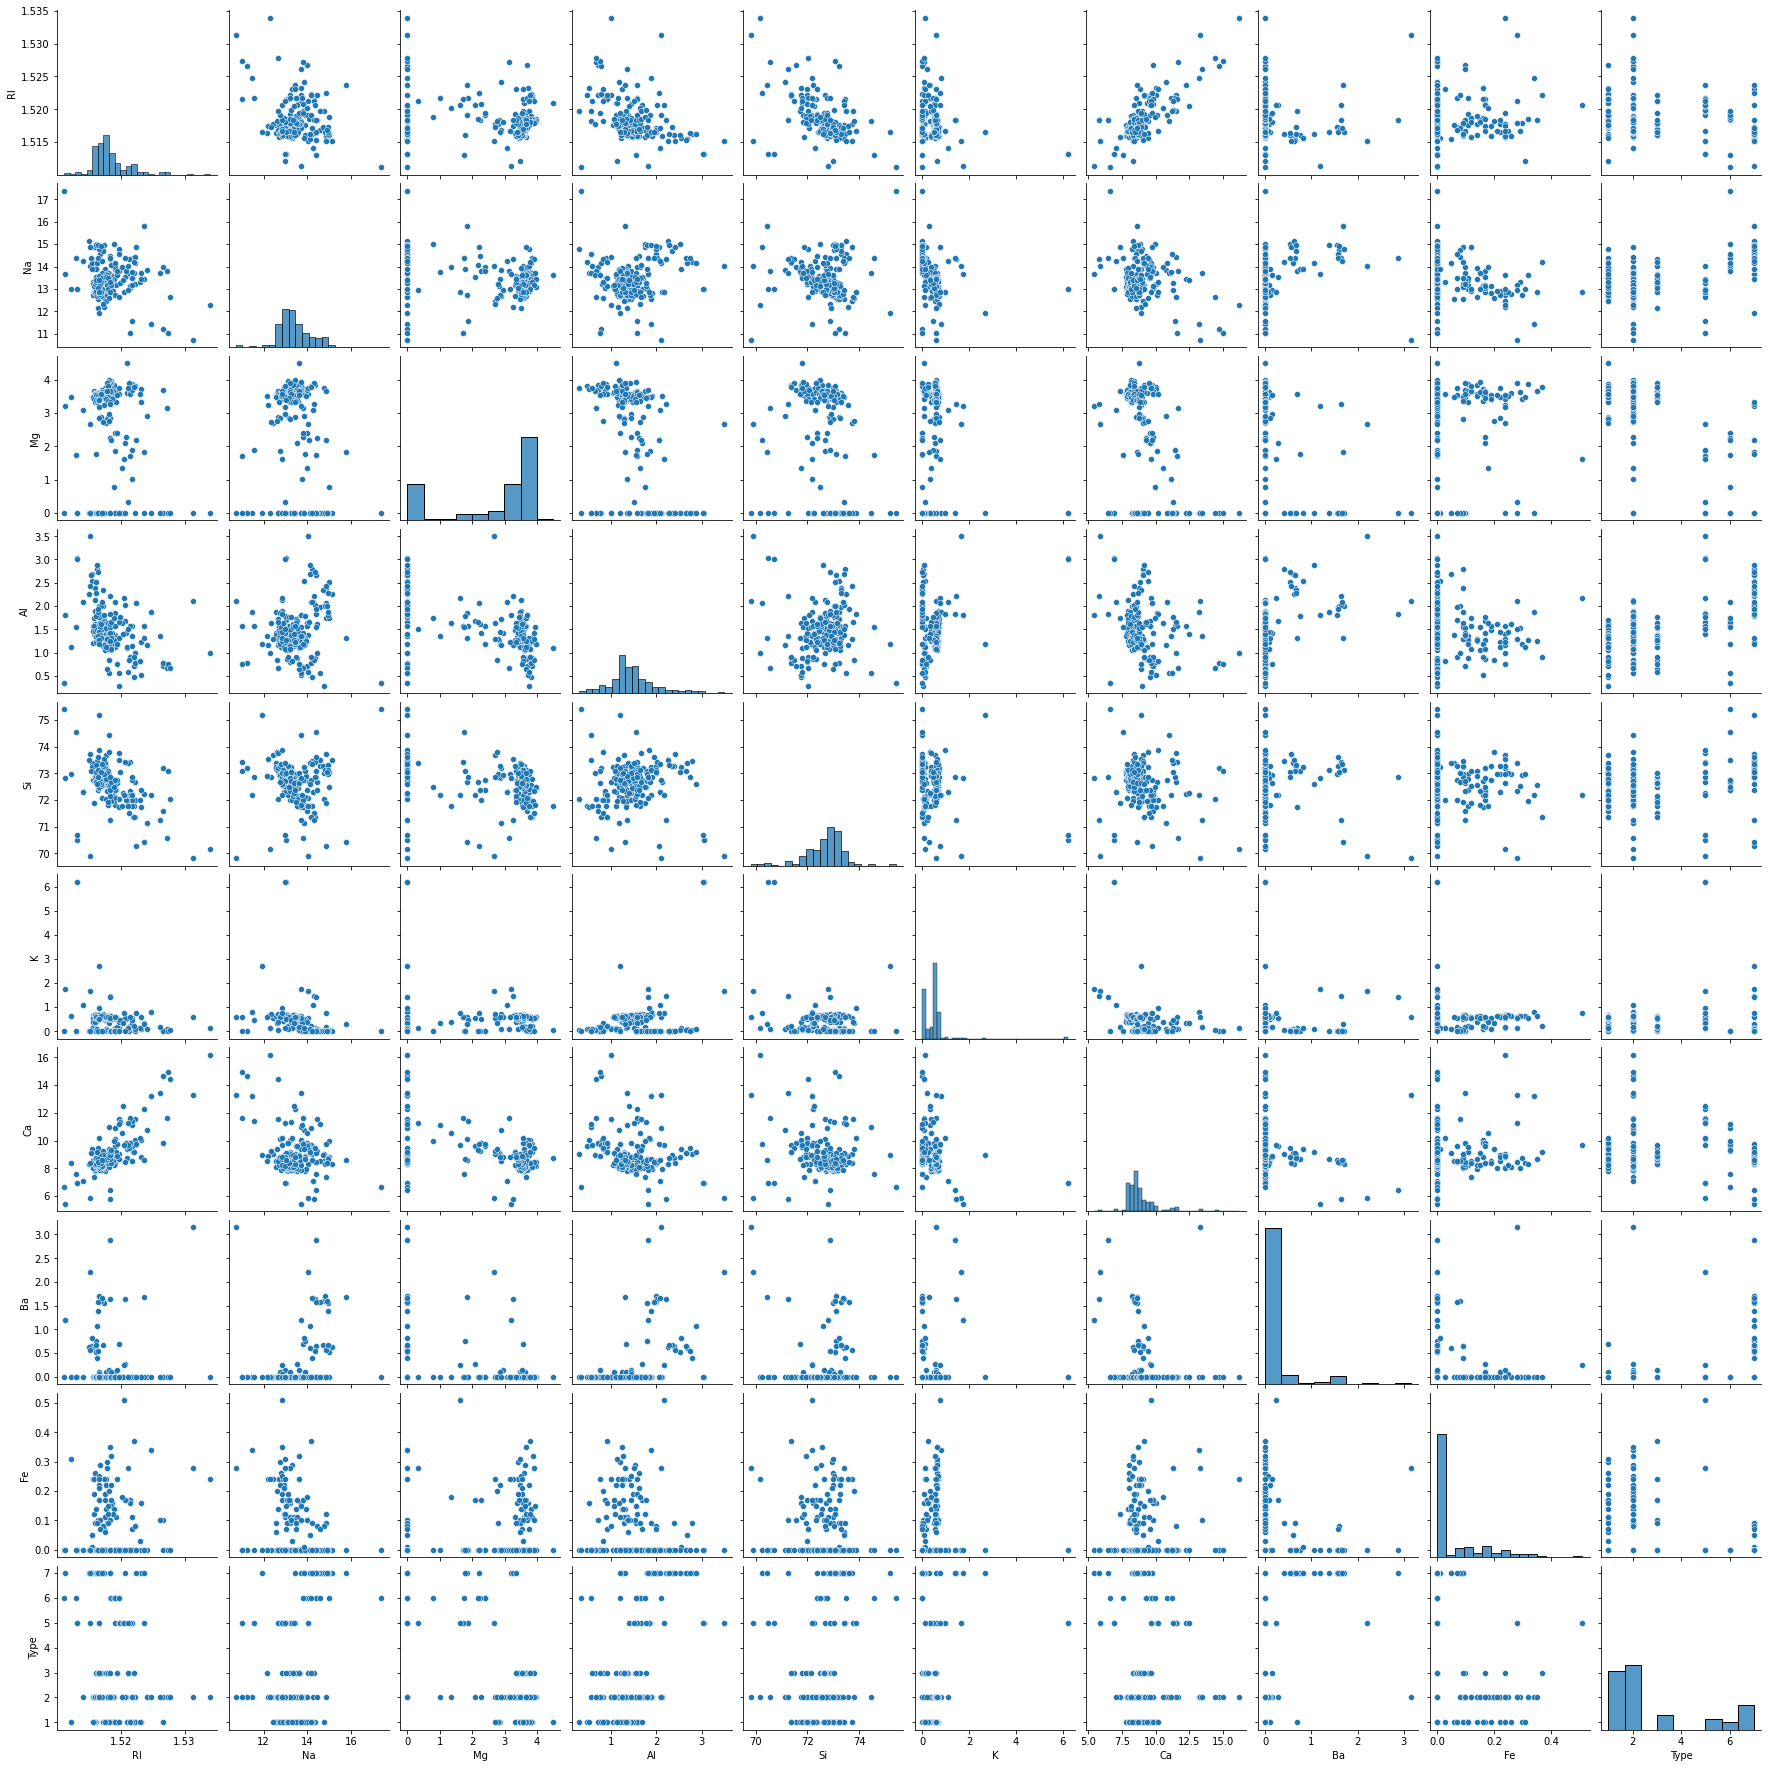

In [26]:
sns.pairplot(glass)